In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import seaborn as sns

from HighResQHD import HighResQHD

from numpy import sin, cos, sqrt, pi, exp

In [2]:
# Figure 1
# Styblinski-Tang function

lb = -5
rb = 5
s = lambda t: 100
beta = lambda t: - 0.03 #lambda t: 5e-3 * np.sqrt(s(t))
success_gap = 1
N = 128

c = 0.2

def f(X,Y):
    # return c * ((10*X-5)**4 - 16 * (10*X-5)**2 + 5 * (10*X-5)) + \
    #         c * ((10*Y-5)**4 - 16 * (10*Y-5)**2 + 5 * (10*Y-5))
    return c * (X**4 - 16 * X**2 + 5 * X) + \
            c * (Y**4 - 16 * Y**2 + 5 * Y)

def df_dx(X,Y):
    return c * (4 * X**3 - 32*X+ 5)

def df_dy(X,Y):
    return c * (4 * Y**3 - 32*Y + 5)

grad = [df_dx, df_dy]

# f = lambda x: (4 * x - 2)**4 - (4 * x - 2 - 1/8)**2
# grad = lambda x: 16 * (4 * x - 2)**3 - 8 * (4 * x - 2 - 1/8)

In [3]:
model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
T = 5
print(f'f_min = {fmin}')

f_min = -31.330637335777283


In [35]:
snapshot_times_0, obj_val_0, success_prob_0, wave_fun_qhd = model.qhd_simulator(T, 500, 1, return_wave_fun=True)
snapshot_times_1, obj_val_1, success_prob_1, wave_fun_high_res_qhd = model.high_res_qhd_simulator(T, 500, 1, 200, return_wave_fun=True)
# snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 500, 2e-2) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 500, 1e-2) 
# snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_samples(1000, 500, 1e-2) 
snapshot_times_5, obj_val_5, success_prob_5 = model.sgd_momentum_samples(1000, 500, 1e-2) 


y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
# y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
# y_data_4 = obj_val_4 - fmin
y_data_5 = obj_val_5 - fmin

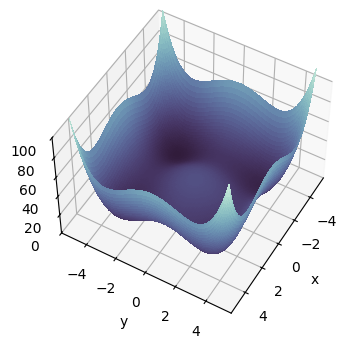

In [6]:
# Figure 1a: surface plot of Styblinski-Tang

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=50, azim=30, roll=0)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif"
})
cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)

surf = ax.plot_surface(model.X, model.Y, model.V - fmin,
                       rstride=1,cstride=1,cmap=cm,
                        linewidth=0, antialiased=False)
ax.set_zlim(0, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.zaxis.set_major_locator(LinearLocator(6))
# plt.savefig('st_obj_landscape.png', dpi=300)

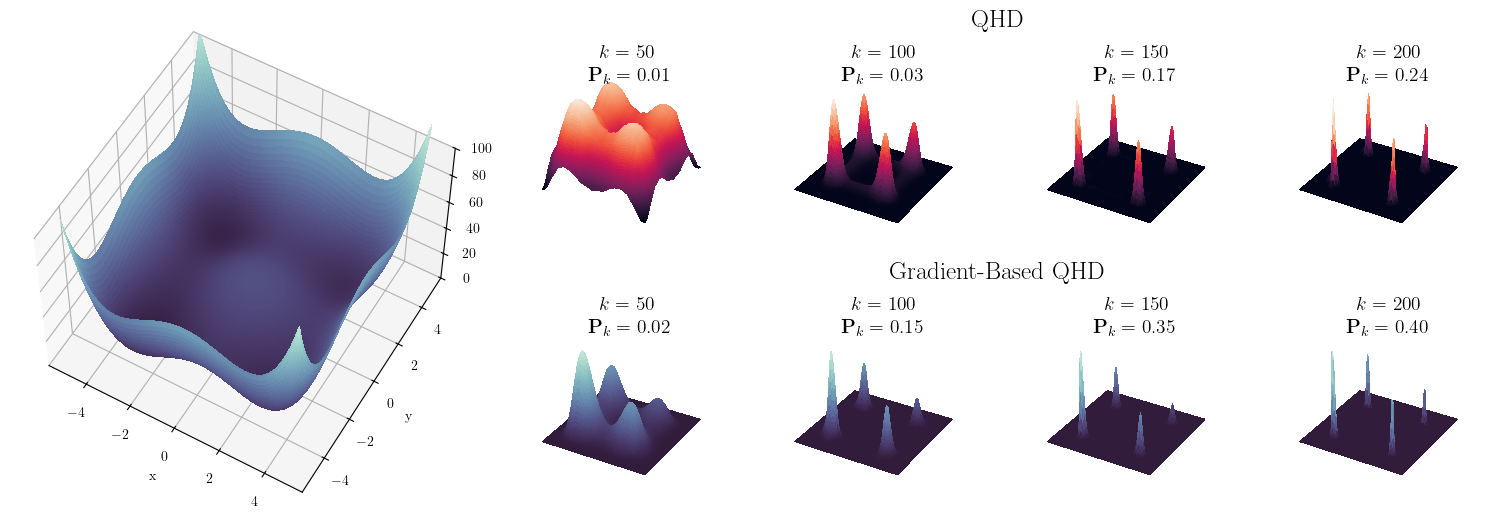

In [29]:
# Figure 1 (full): comparison between QHD and high-res-QHD
 
fig = plt.figure(figsize=(19,6))
gs = fig.add_gridspec(2, 6)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amssymb}"
})

cm_1 = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
cm_2 = sns.color_palette("rocket", as_cmap=True)


ax0 = fig.add_subplot(gs[:2, :2], projection='3d')
ax0.view_init(elev=55)
surf = ax0.plot_surface(model.X, model.Y, model.V - fmin,
                       rstride=1,cstride=1,cmap=cm_1,
                        linewidth=0, antialiased=False)
ax0.set_zlim(0, 100)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
# ax.zaxis.set_major_locator(LinearLocator(6))

ax1 = fig.add_subplot(gs[0, 2:6])
ax1.set_title('QHD', fontsize=18)
ax1.set_axis_off()

ax2 = fig.add_subplot(gs[1,2:6])
ax2.set_title('Gradient-Based QHD', fontsize=18)
ax2.set_axis_off()



for i in range(4):
    ax = fig.add_subplot(gs[0, 2+i], projection='3d')
    prob_qhd = abs(wave_fun_qhd[50*(i+1)])**2
    surf = ax.plot_surface(model.X, model.Y, prob_qhd, 
                           rstride=1,cstride=1,cmap=cm_2,
                           linewidth=0, antialiased=False)
    ax.text2D(-0.02, 0.07, r"$k = $" + f" {50 * (i+1)}", fontsize=14)
    ax.text2D(-0.03, 0.05, r"$\mathbf{P}_k = $" + f" {success_prob_0[50*(i+1)]:.2f}", fontsize=14)
    ax.set_axis_off()

    ax = fig.add_subplot(gs[1, 2+i], projection='3d')
    prob_high_res_qhd = abs(wave_fun_high_res_qhd[50*(i+1)])**2
    surf = ax.plot_surface(model.X, model.Y, prob_high_res_qhd,
                           rstride=1,cstride=1,cmap=cm_1,
                           linewidth=0, antialiased=False)
    ax.text2D(-0.02, 0.07, r"$k = $" + f" {50 * (i+1)}", fontsize=14)
    ax.text2D(-0.03, 0.05, r"$\mathbf{P}_k = $" + f" {success_prob_1[50*(i+1)]:.2f}", fontsize=14)
    ax.set_axis_off()

# plt.savefig('fig1_st_evolution.png', dpi=300, bbox_inches='tight')

## Figure 2: Stybliski-Tang function

In [30]:
LABELS = ['SGD with momentum', 'NAG', 'QHD', 'High-Res QHD']
COLORS = ['limegreen', 'teal', 'skyblue', 'navy']
Y_DATA_obj = [y_data_5, y_data_3, y_data_0, y_data_1]
Y_DATA_prob = [success_prob_5, success_prob_3, success_prob_0, success_prob_1]
iter_number = np.linspace(1, 500, 500)

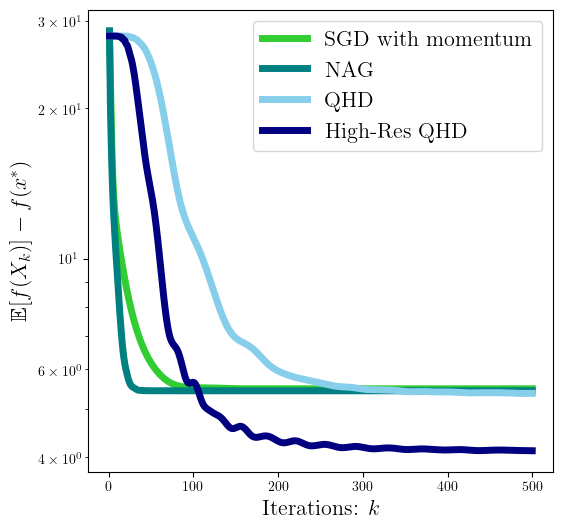

In [ ]:
# objective function value

fig = plt.figure(figsize=(6,6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

for i in range(4):
    plt.plot(iter_number, Y_DATA_obj[i], label=LABELS[i], color=COLORS[i], linewidth=5)

plt.legend(fontsize=16)
plt.yscale('log')
plt.xlabel('Iterations: ' + r'$k$', fontsize=16)
plt.ylabel(r'$\mathbb{E}[f(X_k)] - f(x^*)$', fontsize=16)

# plt.savefig('st_obj.png', dpi=300, bbox_inches='tight')

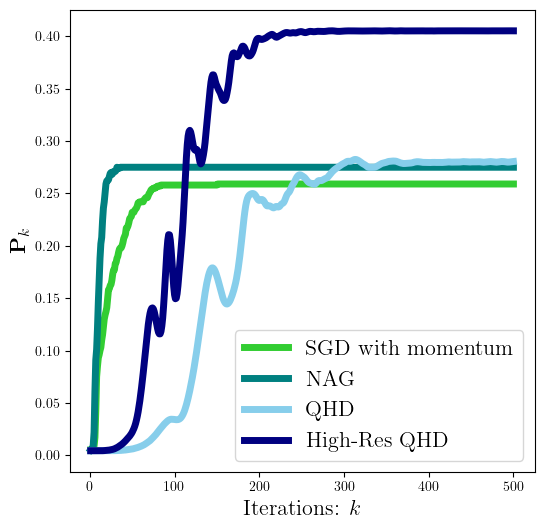

In [ ]:
# success probability

fig = plt.figure(figsize=(6,6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amssymb}"
})

for i in range(4):
    plt.plot(iter_number, Y_DATA_prob[i], label=LABELS[i], color=COLORS[i], linewidth=5)

plt.legend(fontsize=16)
plt.xlabel('Iterations: ' + r'$k$', fontsize=16)
plt.ylabel(r'$\mathbf{P}_k$', fontsize=16)
# plt.ylim([0, 0.5])

# plt.savefig('st_prob.png', dpi=300, bbox_inches='tight')

In [40]:
# fig = plt.figure(figsize=(9, 9))
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "DejaVu Serif"
# })
# cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
# # cm = sns.color_palette("rocket", as_cmap=True)

# ax1 = fig.add_subplot(221, projection='3d')
# ax1.view_init(elev=50, azim=30, roll=0)
# surf = ax1.plot_surface(model.X, model.Y, model.V - fmin, 
#                         rstride=1,cstride=1,cmap=cm,
#                         linewidth=0, antialiased=False)
# ax1.set_zlim(0, 100)
# ax1.set_xlabel('x')
# ax1.set_ylabel('y')
# ax1.zaxis.set_major_locator(LinearLocator(6))
# # A StrMethodFormatter is used automatically
# # ax1.zaxis.set_major_formatter('{x:.1f}')

# LABELS = ['SGD', 'NAGD', 'QHD', 'High-Res QHD']
# COLORS = ['limegreen', 'teal', 'skyblue', 'navy']


# ax2 = fig.add_subplot(222)
# ax2.contourf(model.X, model.Y, model.V - fmin,cmap=cm)
# ax2.plot([-2.90], [-2.90], marker='*', color='white', markersize=15)
# ax2.set_xlabel('x')
# ax2.set_ylabel('y')

# ax3 = fig.add_subplot(223)

# y_data_0 = obj_val_0 - fmin
# y_data_1 = obj_val_1 - fmin
# # y_data_2 = obj_val_2 - fmin
# y_data_3 = obj_val_3 - fmin
# y_data_4 = obj_val_4 - fmin

# iter_number = np.linspace(1, 500, 500)
# # X_DATA_3 = [snapshot_times_4, snapshot_times_3, snapshot_times_0, snapshot_times_1]
# Y_DATA_3 = [y_data_4, y_data_3, y_data_0, y_data_1]

# for i in range(4):
#     ax3.plot(iter_number, Y_DATA_3[i], label=LABELS[i], color=COLORS[i], linewidth=5)
# # ax3.plot(snapshot_times_1, y_data_1, label='High-Res QHD', linewidth=3, color='indigo')
# # ax3.plot(snapshot_times_0, y_data_0, label='QHD', linewidth=3, color='royalblue')
# # # ax3.plot(snapshot_times_2, y_data_2, label='GD', linewidth=5)
# # ax3.plot(snapshot_times_3, y_data_3, label='NAGD', linewidth=3, color='skyblue')
# # ax3.plot(snapshot_times_4, y_data_4, label='SGD', linewidth=3, color='teal')

# ax3.legend(fontsize=12)
# ax3.set_yscale('log')
# ax3.set_title('Objective Function Value', fontsize=16)
# ax3.set_xlabel('\# of Iterations', fontsize=14)
# # ax3.set_ylim([3, 30])


# ax4 = fig.add_subplot(224)

# Y_DATA_4 = [success_prob_4, success_prob_3, success_prob_0, success_prob_1]

# for i in range(4):
#     ax4.plot(iter_number, Y_DATA_4[i], label=LABELS[i], color=COLORS[i], linewidth=5)
# # ax4.plot(snapshot_times_0, success_prob_0, label='QHD', linewidth=5)
# # ax4.plot(snapshot_times_1, success_prob_1, label='High-res QHD', linewidth=5)
# # # ax3.plot(snapshot_times_2, success_prob_2, label='GD', linewidth=5)
# # ax4.plot(snapshot_times_3, success_prob_3, label='NAGD', linewidth=5)
# # ax4.plot(snapshot_times_4, success_prob_4, label='SGD', linewidth=5)
# ax4.legend(fontsize=12)
# ax4.set_title('Success Probability', fontsize=16)
# ax4.set_xlabel('\# of Iterations', fontsize=14)
# ax4.set_ylim([0, 0.5])

# # plt.savefig('s-t.png', dpi=300, bbox_inches='tight')

# Figure 3: convex optimization

In [41]:
# convex convergence

lb = -2
rb = 2
N = 128
success_gap = 1
s = lambda t: 10
beta = lambda t: - 0.1 # 0.01 * np.sqrt(s(t))

def f(X,Y):
    # return (X + Y)**4 / 32 + (X-Y)**4 / 16
    return (X + Y)**4 / 256 + (X-Y)**4 / 128

def du_dx(X,Y):
    # return (X+Y)**3 / 8 + (X-Y)**3 / 4
    return (X + Y)**3 / 64 + (X-Y)**3 / 32

def du_dy(X,Y):
    # return (X+Y)**3 / 8 - (X-Y)**3 / 4
    return (X + Y)**3 / 64 - (X-Y)**3 / 32

grad = [du_dx, du_dy]

model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta, gamma=5)
num_iterations = 25
iter_nums = np.linspace(1, num_iterations, num_iterations)

# run simulation
T = 6
snapshot_times_1, obj_val_1, success_prob_1, wave_fun_1 = model.qhd_simulator(T, 25, 1, return_wave_fun=True, T0=1)
snapshot_times_2, obj_val_2, success_prob_2, wave_fun_2 = model.high_res_qhd_simulator(T, 25, 1, return_wave_fun=True, T0=1)
snapshot_times_3, obj_val_3, success_prob_3, grad_norm_3 = model.sgd_momentum_samples(1000, 25, 2e-1, return_grad_norm=True)
snapshot_times_4, obj_val_4, success_prob_4, grad_norm_4 = model.nesterov_samples(1000, 25, 2e-1, return_grad_norm=True) 

# compute grad norm
grad_norm_1 = []
grad_norm_2 = []

for i in range(len(wave_fun_1)):
    prob_1 = abs(wave_fun_1[i])**2
    prob_2 = abs(wave_fun_2[i])**2

    grad_norm_1.append(np.sum(prob_1 * model.G2))
    grad_norm_2.append(np.sum(prob_2 * model.G2))

In [ ]:
OBJ_DATA = [obj_val_3, obj_val_4, obj_val_1, obj_val_2]
GRAD_NM_DATA = [grad_norm_3, grad_norm_4, grad_norm_1, grad_norm_2]
LABELS = ['SGD with momentum', 'NAG', 'QHD', 'High-Res QHD']
COLORS = ['limegreen', 'teal', 'skyblue', 'navy']
MARKERS = ['o', 'X', 's', 'v']

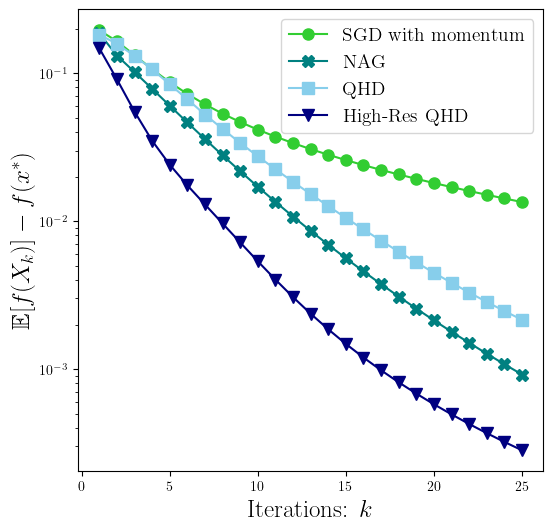

In [ ]:
# objective function value 

fig = plt.figure(figsize=(6, 6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)

for i in range(4):
    plt.plot(iter_nums, OBJ_DATA[i], '-', marker=MARKERS[i], 
             label=LABELS[i], color=COLORS[i], markersize=8)

plt.yscale('log')
plt.xlabel('Iterations: ' + r'$k$', fontsize=18)
plt.ylabel(r'$\mathbb{E}[f(X_k)] - f(x^*)$', fontsize=18)
plt.legend(fontsize=14)

# plt.savefig('convex_plot_a.png', dpi=300, bbox_inches='tight')

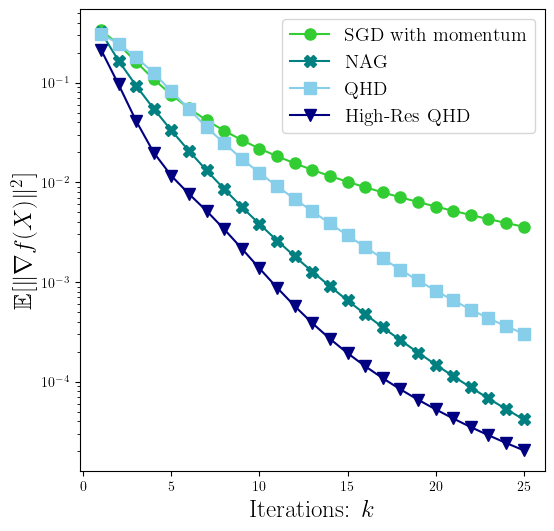

In [53]:
# gradient norm minimization

fig = plt.figure(figsize=(6, 6))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})

cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)

for i in range(4):
    plt.plot(iter_nums, GRAD_NM_DATA[i], '-', marker=MARKERS[i],
             label=LABELS[i], color=COLORS[i], markersize=8)

plt.yscale('log')
plt.xlabel('Iterations: ' + r'$k$', fontsize=18)
plt.ylabel(r'$\mathbb{E}[\|\nabla f(X)\|^2]$', fontsize=18)
plt.legend(fontsize=14)

# plt.savefig('convex_plot_b.png', dpi=300, bbox_inches='tight')

In [54]:
# fig = plt.figure(figsize=(9, 4))
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "DejaVu Serif",
#     'text.latex.preamble': r'\usepackage{amsfonts}'
# })

# cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
# # cm = sns.color_palette("rocket", as_cmap=True)

# ax1 = fig.add_subplot(121)
# for i in range(4):
#     ax1.plot(iter_nums, OBJ_DATA[i], '-', marker=MARKERS[i], 
#              label=LABELS[i], color=COLORS[i], markersize=7)
# ax1.set_xlabel('\# of Iterations', fontsize=14)
# ax1.set_yscale('log')
# ax1.set_title(r'$\mathbb{E}[f(X)]$', fontsize=18)
# ax1.legend(fontsize=11)

# ax2 = fig.add_subplot(122)
# for i in range(4):
#     ax2.plot(iter_nums, GRAD_NM_DATA[i], '-', marker=MARKERS[i],
#              label=LABELS[i], color=COLORS[i])
# ax2.set_xlabel('\# of Iterations', fontsize=14)
# ax2.set_yscale('log')
# ax2.set_title(r'$\mathbb{E}[\|\nabla f(X)\|^2]$', fontsize=18)
# ax2.legend(fontsize=11)

# # plt.savefig('convex_plot.png', dpi=300, bbox_inches='tight')

# Figure 4-6: non-convex optimization

## Figure 4: Michalewicz function 

In [55]:
# Michalewicz function 

lb = 0
rb = pi 
N = 128 
success_gap = 0.5
s = lambda t: 10
beta = lambda t: -0.05 # 0.01 * np.sqrt(s(t))

def f(X,Y):
    return - sin(X) * sin(X**2/pi)**20 - sin(Y) * sin(2 * Y**2/pi)**20

def du_dx(X,Y):
    return - (1 / pi) * sin(X**2/pi)**19 * (40*X*sin(X)*cos(X**2/pi) + pi*sin(X**2/pi)*cos(X))

def du_dy(X,Y):
    return - (1 / pi) * sin(2*Y**2/pi)**19 * (80*Y*sin(Y)*cos(2*Y**2/pi) + pi*sin(2*Y**2/pi)*cos(Y))

grad = [du_dx, du_dy]

model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
print(f'f_min = {fmin}')

f_min = -1.8007117290439534


In [59]:
T = 10
snapshot_times_0, obj_val_0, success_prob_0  = model.qhd_simulator(T, 1000, 1)
snapshot_times_1, obj_val_1, success_prob_1 = model.high_res_qhd_simulator(T, 1000, 1)
# snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 1000, 1e-2) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 1000, 1e-2) 
snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_momentum_samples(1000, 1000, 1e-2)

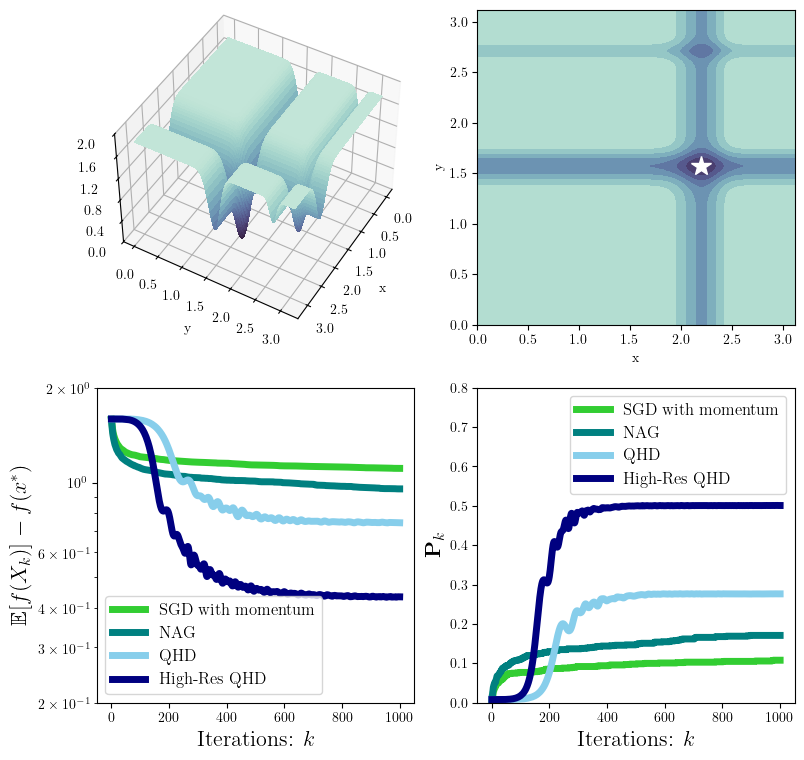

In [ ]:
# Figure 3
iter_number = np.linspace(1, 1000, 1000)

fig = plt.figure(figsize=(9, 9))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})
cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
# cm = sns.color_palette("rocket", as_cmap=True)

ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(elev=45, azim=30, roll=0)
surf = ax1.plot_surface(model.X, model.Y, model.V - fmin, 
                        rstride=1,cstride=1,cmap=cm,
                        linewidth=0, antialiased=False)
ax1.set_zlim(0, 2)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.zaxis.set_major_locator(LinearLocator(6))
# A StrMethodFormatter is used automatically
# ax1.zaxis.set_major_formatter('{x:.1f}')

LABELS = ['SGD with momentum', 'NAG', 'QHD', 'High-Res QHD']
COLORS = ['limegreen', 'teal', 'skyblue', 'navy']


ax2 = fig.add_subplot(222)
ax2.contourf(model.X, model.Y, model.V,cmap=cm)
ax2.plot([2.2], [1.57], marker='*', color='white', markersize=15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax3 = fig.add_subplot(223)

y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
# y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
y_data_4 = obj_val_4 - fmin

# X_DATA_3 = [snapshot_times_4, snapshot_times_3, snapshot_times_0, snapshot_times_1]
Y_DATA_3 = [y_data_4, y_data_3, y_data_0, y_data_1]

for i in range(4):
    ax3.plot(iter_number, Y_DATA_3[i], label=LABELS[i], color=COLORS[i], linewidth=5)

ax3.legend(fontsize=12)
ax3.set_yscale('log')
# ax3.set_title('Objective Function Value', fontsize=18)
ax3.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax3.set_ylabel(r'$\mathbb{E}[f(X_k)] - f(x^*)$', fontsize=16)
ax3.set_ylim([2e-1, 2])


ax4 = fig.add_subplot(224)

Y_DATA_4 = [success_prob_4, success_prob_3, success_prob_0, success_prob_1]

for i in range(4):
    ax4.plot(iter_number, Y_DATA_4[i], label=LABELS[i], color=COLORS[i], linewidth=5)

ax4.legend(fontsize=12)
# ax4.set_title('Success Probability', fontsize=18)
ax4.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax4.set_ylabel(r'$\mathbf{P}_k$', fontsize=16)
ax4.set_ylim([0,0.8])

# plt.savefig('michalewicz.png', dpi=300, bbox_inches='tight')

## Figure 5: Cube-Wave Function

In [64]:
# Quadruple well

lb = -2
rb = 2
N = 128
success_gap = 1
s = lambda t: 10
beta = lambda t: -0.05 # 0.01 * np.sqrt(s(t))

def f(X,Y):
    return cos(pi*X)**2 + 0.25 * X**4 + cos(pi*Y)**2 + 0.25 * Y**4

def du_dx(X,Y):
    return -2 * pi * cos(pi*X) * sin(pi*X) + X**3

def du_dy(X,Y):
    return -2 * pi * cos(pi*Y) * sin(pi*Y) + Y**3

grad = [du_dx, du_dy]

In [65]:
model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
T = 10
print(f'f_min = {fmin}')
# plt.imshow(model.V < success_gap)

# plt.contourf(model.X, model.Y, model.V)
# plt.colorbar()
# plt.title('Test Case 1')
# # plt.savefig('test_case_1.png', dpi=300)

f_min = 0.03125


In [66]:
snapshot_times_0, obj_val_0, success_prob_0  = model.qhd_simulator(T, 500, 1)
snapshot_times_1, obj_val_1, success_prob_1 = model.high_res_qhd_simulator(T, 500, 1)
# snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 1000, 1e-2) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 500, 2e-2) 
snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_momentum_samples(1000, 500, 2e-2)

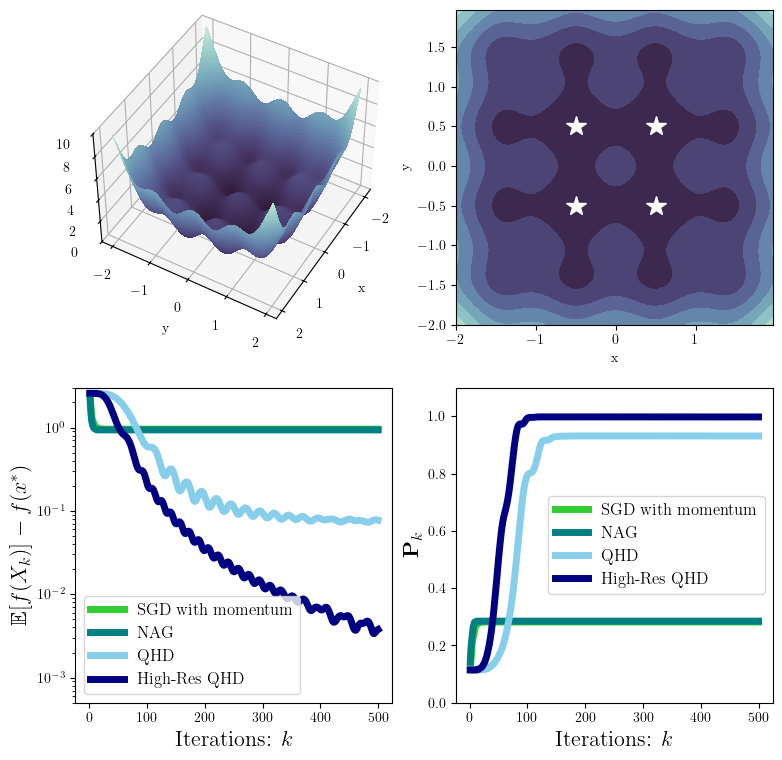

In [68]:
# Figure 3

# plt.style.use('_mpl-gallery')

fig = plt.figure(figsize=(9, 9))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})
cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
# cm = sns.color_palette("rocket", as_cmap=True)

ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(elev=45, azim=30, roll=0)
surf = ax1.plot_surface(model.X, model.Y, model.V, 
                        rstride=1,cstride=1,cmap=cm,
                        linewidth=0, antialiased=False)
ax1.set_zlim(0, 10)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.zaxis.set_major_locator(LinearLocator(6))
# A StrMethodFormatter is used automatically
# ax1.zaxis.set_major_formatter('{x:.1f}')

LABELS = ['SGD with momentum', 'NAG', 'QHD', 'High-Res QHD']
COLORS = ['limegreen', 'teal', 'skyblue', 'navy']


ax2 = fig.add_subplot(222)
ax2.contourf(model.X, model.Y, model.V,cmap=cm)
ax2.plot([-0.5], [-0.5], marker='*', color='white', markersize=15)
ax2.plot([-0.5], [0.5], marker='*', color='white', markersize=15)
ax2.plot([0.5], [-0.5], marker='*', color='white', markersize=15)
ax2.plot([0.5], [0.5], marker='*', color='white', markersize=15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax3 = fig.add_subplot(223)

y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
# y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
y_data_4 = obj_val_4 - fmin

iter_number = np.linspace(1, 500, 500)
Y_DATA_3 = [y_data_4, y_data_3, y_data_0, y_data_1]

for i in range(4):
    ax3.plot(iter_number, Y_DATA_3[i], label=LABELS[i], color=COLORS[i], linewidth=5)

ax3.legend(fontsize=12)
ax3.set_yscale('log')
ax3.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax3.set_ylabel(r'$\mathbb{E}[f(X_k)] - f(x^*)$', fontsize=16)
ax3.set_ylim([5e-4, 3])


ax4 = fig.add_subplot(224)

Y_DATA_4 = [success_prob_4, success_prob_3, success_prob_0, success_prob_1]

for i in range(4):
    ax4.plot(iter_number, Y_DATA_4[i], label=LABELS[i], color=COLORS[i], linewidth=5)

ax4.legend(fontsize=12)
ax4.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax4.set_ylabel(r'$\mathbf{P}_k$', fontsize=16)
ax4.set_ylim([0,1.1])

# plt.savefig('cube-wave.png', dpi=300, bbox_inches='tight')

## Figure 6: Rastrigin Function

In [69]:
# Rastrigin function
lb = -3
rb = 3
N = 128
success_gap = 1
s = lambda t: 10
beta = lambda t: -0.05 # lambda t: 0.01 * np.sqrt(s(t))

def f(X,Y):
    return X**2 - 10 * cos(2*pi*X) + Y**2 - 10 * cos(2*pi*Y) + 20
def du_dx(X,Y):
    return 2*X + 20*pi*sin(2*pi*X)

def du_dy(X,Y):
    return 2*Y + 20*pi*sin(2*pi*Y)

grad = [du_dx, du_dy]

f_min = 0.0


Text(0.5, 1.0, 'Test Case 2')

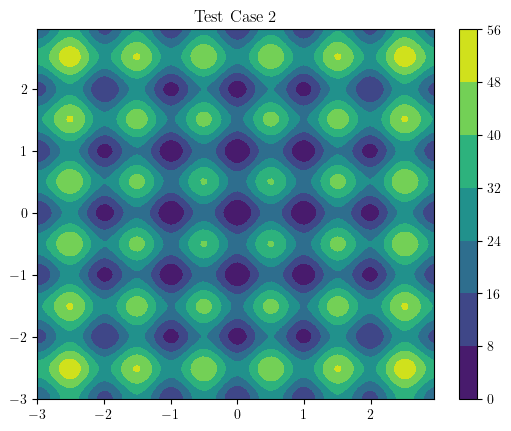

In [70]:
model = HighResQHD(f, grad, lb, rb, N, success_gap, s, beta)
fmin = model.get_fmin()
print(f'f_min = {fmin}')

plt.contourf(model.X, model.Y, model.V)
plt.colorbar()
plt.title('Test Case 2')
# plt.savefig('test_case_2.png', dpi=300)

In [71]:
T = 5
snapshot_times_0, obj_val_0, success_prob_0 = model.qhd_simulator(T, 1000, 1)
snapshot_times_1, obj_val_1, success_prob_1 = model.high_res_qhd_simulator(T, 1000, 1)
# snapshot_times_2, obj_val_2, success_prob_2 = model.gd_samples(1000, 1000, 5e-3) 
snapshot_times_3, obj_val_3, success_prob_3 = model.nesterov_samples(1000, 1000, 1e-3) 
snapshot_times_4, obj_val_4, success_prob_4 = model.sgd_momentum_samples(1000, 1000, 1e-3)

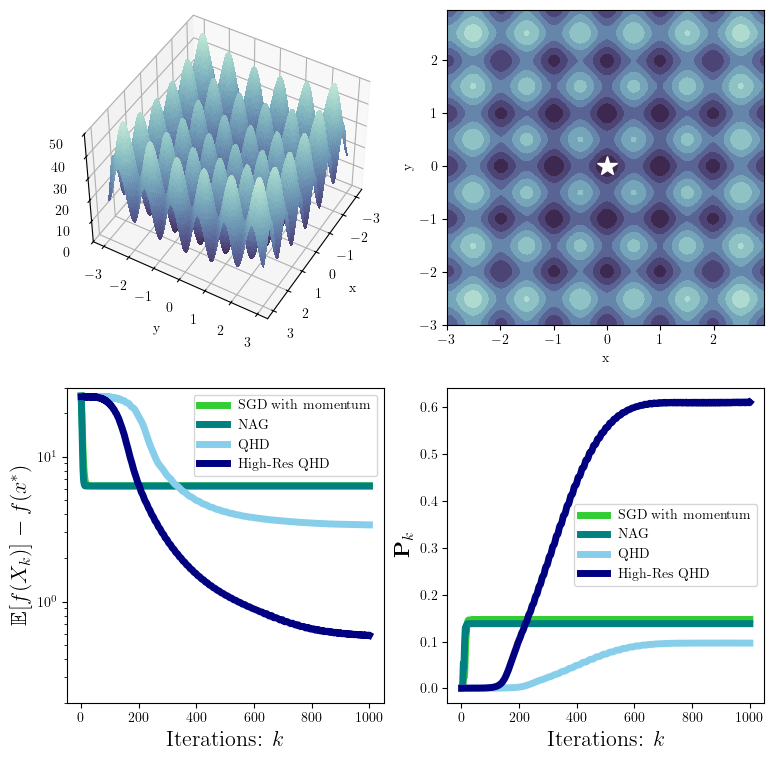

In [77]:
# Figure 4

fig = plt.figure(figsize=(9, 9))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "DejaVu Serif",
    "text.latex.preamble": r"\usepackage{amsfonts}"
})
cm = sns.cubehelix_palette(start=.5, rot=-.5, reverse=True, as_cmap=True)
# cm = sns.color_palette("rocket", as_cmap=True)

ax1 = fig.add_subplot(221, projection='3d')
ax1.view_init(elev=45, azim=30, roll=0)
surf = ax1.plot_surface(model.X, model.Y, model.V, 
                        rstride=1,cstride=1,cmap=cm,
                        linewidth=0, antialiased=False)
ax1.set_zlim(0, 50)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.zaxis.set_major_locator(LinearLocator(6))
# A StrMethodFormatter is used automatically
# ax1.zaxis.set_major_formatter('{x:.1f}')

LABELS = ['SGD with momentum', 'NAG', 'QHD', 'High-Res QHD']
COLORS = ['limegreen', 'teal', 'skyblue', 'navy']


ax2 = fig.add_subplot(222)
ax2.contourf(model.X, model.Y, model.V,cmap=cm)
ax2.plot([0], [0], marker='*', color='white', markersize=15)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

ax3 = fig.add_subplot(223)

y_data_0 = obj_val_0 - fmin
y_data_1 = obj_val_1 - fmin
# y_data_2 = obj_val_2 - fmin
y_data_3 = obj_val_3 - fmin
y_data_4 = obj_val_4 - fmin

# X_DATA_3 = [snapshot_times_4, snapshot_times_3, snapshot_times_0, snapshot_times_1]
iter_number = np.linspace(1, 1000, 1000)
Y_DATA_3 = [y_data_4, y_data_3, y_data_0, y_data_1]

for i in range(4):
    ax3.plot(iter_number, Y_DATA_3[i], label=LABELS[i], color=COLORS[i], linewidth=5)

ax3.legend(fontsize=10)
ax3.set_yscale('log')
ax3.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax3.set_ylabel(r'$\mathbb{E}[f(X_k)] - f(x^*)$', fontsize=16)
ax3.set_ylim([2e-1,30])


ax4 = fig.add_subplot(224)

Y_DATA_4 = [success_prob_4, success_prob_3, success_prob_0, success_prob_1]

for i in range(4):
    ax4.plot(iter_number, Y_DATA_4[i], label=LABELS[i], color=COLORS[i], linewidth=5)
    
ax4.legend(fontsize=10)
ax4.set_xlabel('Iterations: ' + r'$k$', fontsize=16)
ax4.set_ylabel(r'$\mathbf{P}_k$', fontsize=16)

# plt.savefig('rastrigin.png', dpi=300, bbox_inches='tight')